<h1 align="center"> Manejo de archivos <code>csv</code></h1>
<h2 align="center"> Aplicación con información de datos de precipitación 📈</h2>

**Objetivo**

En la presente libreta veremos el uso de la librería `pandas` para el manejo de archivos `.csv` (delimitado por comas) usando datos de precipitación de manera aplicativa.

In [1]:
# Realizar un cambio de ruta a la carpeta con csv's

import os 
print('Ruta inicial:\n', os.getcwd()) # Antes

# cambio a carpeta con csv's en local
os.chdir('E:\Desktop\prueba') 

print('Ruta final:\n', os.getcwd()) # Después

# Listar archivos en la carpeta contenedora de csv's
os.listdir()

Ruta inicial:
 C:\Users\LENOVO\Documents\GitHub-repos\Playing-with-colab\jupyter_notebooks
Ruta final:
 E:\Desktop\prueba


['ALTAMIZA.csv',
 'BARRIOS.csv',
 'BERNAL.csv',
 'CANCHAQUE.csv',
 'CHALACO.csv',
 'CHIGNIA.csv',
 'prueba.py']

## Lectura de archivos `csv`

Los siguientes archivos `.csv` se obtuvieron del portal ANA y presentan información sobre estaciones climatológicas de la cuenca Piura.

A continuación veremos dos casos:
- Cuando se tiene un archivo csv de manera ordenada (tratada)
- Cuando se tiene un archivo por ordenar

Importamos la librería `pandas` para el procesamiento de datos y la librería `matplotlib` para la visualización de los mismos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### **Caso 1: Archivo `csv` ordenado, las fechas presentan buen formato para editar**

In [3]:
# Importando archivo csv
est_ALTAMIZA = pd.read_csv('ALTAMIZA.csv')

# Tipo de estac_1
print(f'tipo: {type(est_ALTAMIZA)}') # DataFrame

display(est_ALTAMIZA.head())

tipo: <class 'pandas.core.frame.DataFrame'>


ESTACION                                     OPERADOR  \
0  ALTAMIZA  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   
1  ALTAMIZA  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   
2  ALTAMIZA  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   
3  ALTAMIZA  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   
4  ALTAMIZA  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   

                  VARIABLE       FECHA  VALOR UNIDADMEDIDA  
0  PRECIPITACION ACU 12HOR  1972-12-01    0.0            m  
1  PRECIPITACION ACU 12HOR  1972-12-02    0.0           mm  
2  PRECIPITACION ACU 12HOR  1972-12-03    0.0           mm  
3  PRECIPITACION ACU 12HOR  1972-12-04    0.0           mm  
4  PRECIPITACION ACU 12HOR  1972-12-05    4.1           mm

In [4]:
# Eliminamos información irrevelante
est_ALTAMIZA = est_ALTAMIZA.iloc[:,3:].drop('UNIDADMEDIDA', axis=1)
est_ALTAMIZA.head()

FECHA  VALOR
0  1972-12-01    0.0
1  1972-12-02    0.0
2  1972-12-03    0.0
3  1972-12-04    0.0
4  1972-12-05    4.1

In [5]:
# Visualizar el 'tipo' de cada columna
est_ALTAMIZA.dtypes

FECHA     object
VALOR    float64
dtype: object

Nótese el tipo `object` de la columna `FECHA`. Esto indica que cada valor en dicha columna es un `string` (cadena de texto) y lo preferible para manejar datos de series de tiempo es usar un tipo `datetime64`.

In [6]:
est_ALTAMIZA.FECHA = pd.to_datetime(est_ALTAMIZA.FECHA)
est_ALTAMIZA.dtypes

FECHA    datetime64[ns]
VALOR           float64
dtype: object

In [7]:
# Volvemos la columna 'FECHA' como índice del DataFrame para su mejor manejo
est_ALTAMIZA.set_index('FECHA', inplace=True)
est_ALTAMIZA.head()

VALOR
FECHA            
1972-12-01    0.0
1972-12-02    0.0
1972-12-03    0.0
1972-12-04    0.0
1972-12-05    4.1

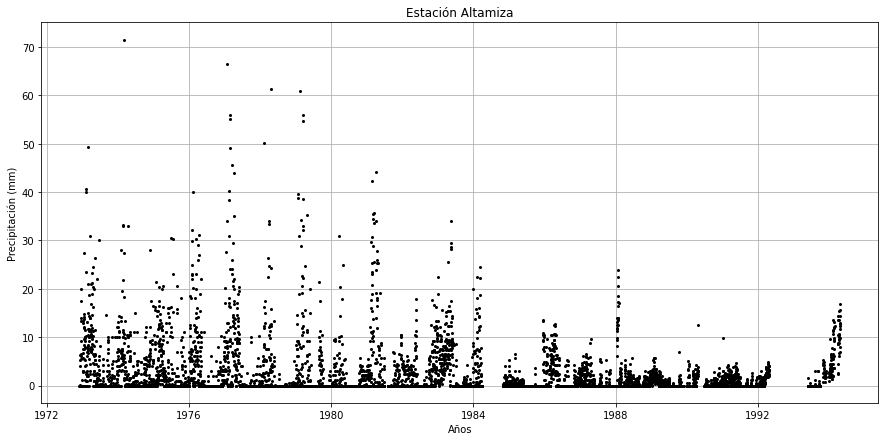

In [8]:
# Visualización básica
#import matplotlib.pyplot as plt

plt.figure(1, figsize=(15,7))
plt.plot(est_ALTAMIZA.VALOR, marker='o', color='black',ms=2, linestyle='none')
plt.title('Estación Altamiza')
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.grid();

Véase los espacios con datos faltantes.

Una vez establecido las fechas como `index`, es posible manejarlas con mayor flexibilidad. A continuación, un ejemplo sobre el filtrado por años y su visualización. 

In [9]:
# Datos del año 1976
est_ALTAMIZA.loc['1976',['VALOR']].head(7)

VALOR
FECHA            
1976-01-01    0.0
1976-01-02    1.2
1976-01-03    7.0
1976-01-04    5.6
1976-01-05    1.1
1976-01-06   18.6
1976-01-07   10.2

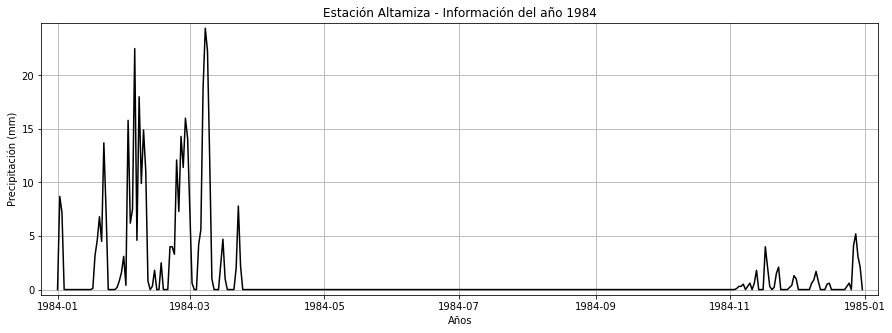

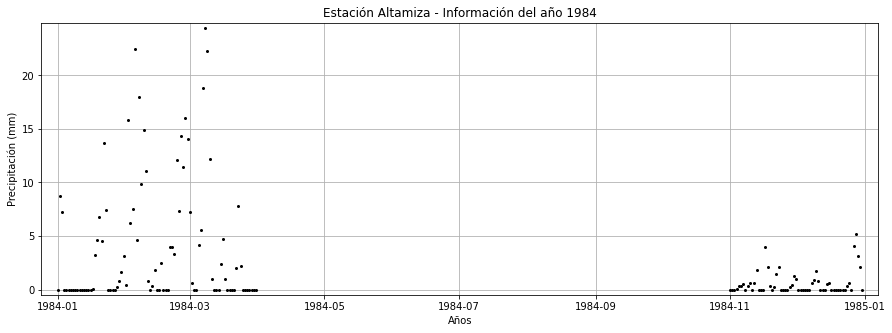

In [10]:
# Visualización del año 1984 de dos maneras: Línea y Puntos
plt.figure(1, figsize=(15,5))
plt.plot(est_ALTAMIZA.loc['1984',['VALOR']], color='black',ms=2, linestyle='-')
plt.title('Estación Altamiza - Información del año 1984')
plt.xlabel('Años'), plt.ylabel('Precipitación (mm)')
plt.margins(0.02)
plt.grid()

plt.figure(2, figsize=(15,5))
plt.plot(est_ALTAMIZA.loc['1984',['VALOR']], marker='o', color='black',ms=2, linestyle='none')
plt.title('Estación Altamiza - Información del año 1984')
plt.xlabel('Años'), plt.ylabel('Precipitación (mm)')
plt.margins(0.02)
plt.grid()

Cuando se presentan datos faltantes (observable según fechas), al usar un estilo de línea para la visualización, ésta tiende a unir todos los puntos que representan datos, presentando así una falsa noción de no tener falta de datos.
Por ello, se optó por puntos, siendo así notable los datos faltantes.

Y también es posible graficar todos los años mediante un bucle `for` como se ve a continuación:

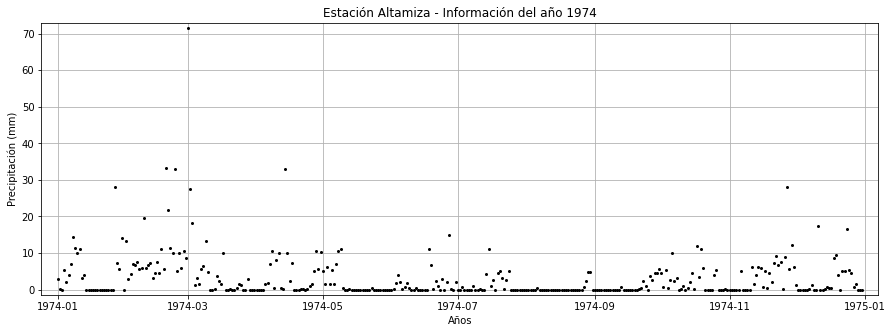

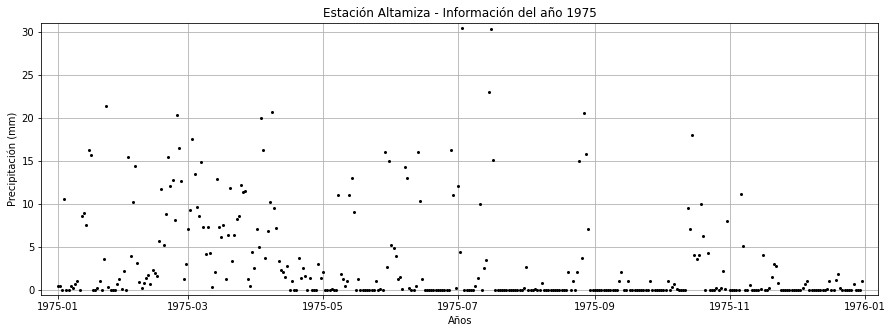

In [11]:
# Generación de gráficas para cada año desde 1972-1975
years_list = [str(i) for i in range(1972, 1975+1)]  

for i in years_list:
    plt.figure(years_list.index(i)+1, figsize=(15,5))
    plt.plot(est_ALTAMIZA.loc[i,['VALOR']], marker='o', color='black',ms=2, linestyle='none')
#     plt.plot(est_ALTAMIZA.loc[i,['VALOR']], color='black',ms=2, linestyle='-')
    plt.title('Estación Altamiza - Información del año '+i)
    plt.xlabel('Años'), plt.ylabel('Precipitación (mm)')
    plt.margins(0.02)
    plt.grid()

Nótese cómo varían los ejes X de fechas, indicando así también cuando hay datos faltantes.

----

### Caso 2: Archivo `csv` en crudo, las fechas presentan un formato que requiere procesar

In [12]:
# Importando archivo csv
est_BARRIOS = pd.read_csv('BARRIOS.csv')
est_BARRIOS.head()

ESTACION                                     OPERADOR  \
0  BARRIOS  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   
1  BARRIOS  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   
2  BARRIOS  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   
3  BARRIOS  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   
4  BARRIOS  SERVICIO NACIONAL METEOROLOGÍA E HIDROLOGÍA   

                  VARIABLE                 FECHA  VALOR UNIDADMEDIDA  
0  PRECIPITACION ACU 12HOR  1973-09-03T00:00:00Z    0.0           mm  
1  PRECIPITACION ACU 12HOR  1973-09-04T00:00:00Z    0.0           mm  
2  PRECIPITACION ACU 12HOR  1973-09-05T00:00:00Z    0.0           mm  
3  PRECIPITACION ACU 12HOR  1973-09-06T00:00:00Z    0.0           mm  
4  PRECIPITACION ACU 12HOR  1973-09-07T00:00:00Z    0.0           mm

In [13]:
# Eliminamos información irrelevante
est_BARRIOS = est_BARRIOS.iloc[:,3:].drop('UNIDADMEDIDA', axis=1)
display(est_BARRIOS.head())

print(est_BARRIOS.dtypes)

FECHA  VALOR
0  1973-09-03T00:00:00Z    0.0
1  1973-09-04T00:00:00Z    0.0
2  1973-09-05T00:00:00Z    0.0
3  1973-09-06T00:00:00Z    0.0
4  1973-09-07T00:00:00Z    0.0

FECHA     object
VALOR    float64
dtype: object


La columna `FECHA` presenta información de tiempo pero de tipo `object` (`string`) y un formato largo que contiene también información de zonas horarias. Es necesario modificarlo para su manejo.

Toca corregir el formato de fecha. Para ello, es necesario realizar ciertos cambios:
1. Convertir la columna `FECHA` de tipo `object` a `datetime64[ns]`.
2. Una vez en `datetime64[ns]` es posible aplicar una función del módulo `datetime` con el fin de modificarlo como `string` (darle un formato a gusto). Devolverá un `object` (`string`).
3. Realizar otra vez el Paso 1 para obtener un tipo `datetime64[ns]`.

In [14]:
# 1. Convertir a tipo fecha
est_BARRIOS.FECHA = pd.to_datetime(est_BARRIOS.FECHA) # devuelve a datetime64[ns] (tipo fecha)

# 2. Modificar el formato (convierte a string)
import datetime as dt
est_BARRIOS.FECHA = est_BARRIOS.FECHA.dt.strftime('%Y/%m/%d') # convierte a string según formato

# 3. Convertir otra vez a tipo fecha
est_BARRIOS.FECHA = pd.to_datetime(est_BARRIOS.FECHA)
display(est_BARRIOS.head())

print(est_BARRIOS.dtypes)

FECHA  VALOR
0 1973-09-03    0.0
1 1973-09-04    0.0
2 1973-09-05    0.0
3 1973-09-06    0.0
4 1973-09-07    0.0

FECHA    datetime64[ns]
VALOR           float64
dtype: object


Ahora volverlo `index`.

In [15]:
# Volver la columna FECHA como index
est_BARRIOS.set_index('FECHA', inplace=True)
display(est_BARRIOS.head())

print(est_BARRIOS.dtypes)

VALOR
FECHA            
1973-09-03    0.0
1973-09-04    0.0
1973-09-05    0.0
1973-09-06    0.0
1973-09-07    0.0

VALOR    float64
dtype: object


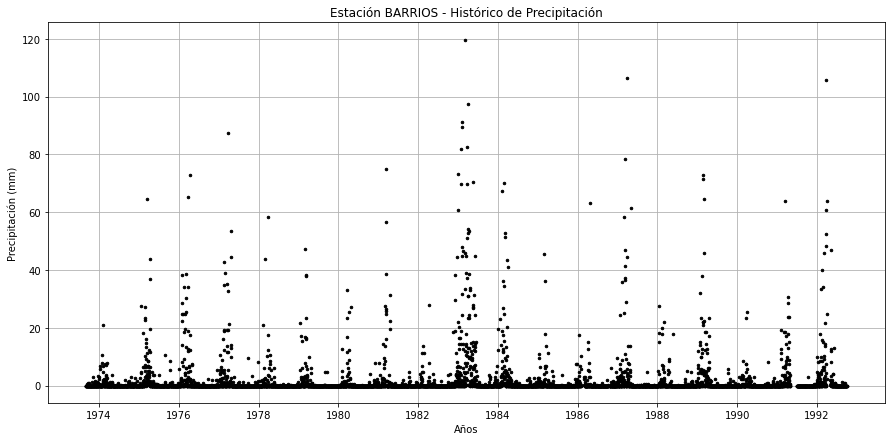

In [16]:
# Visualización
import matplotlib.pyplot as plt

plt.figure(1,figsize=(15,7))

plt.plot(est_BARRIOS.VALOR, c='black', marker='.', linestyle='none', ms=5)
plt.title('Estación BARRIOS - Histórico de Precipitación')
plt.xlabel('Años'), plt.ylabel('Precipitación (mm)')
plt.grid(); 

### Resumen

El proceso para iniciar a manejar fechas como índice queda resumido de la siguiente manera:

In [17]:
est_ALTAMIZA = pd.read_csv('ALTAMIZA.csv')
est_ALTAMIZA = est_ALTAMIZA.iloc[:,3:].drop('UNIDADMEDIDA', axis=1)
est_ALTAMIZA.FECHA = pd.to_datetime(est_ALTAMIZA.FECHA)
est_ALTAMIZA.set_index('FECHA', inplace=True)
est_ALTAMIZA.head()

VALOR
FECHA            
1972-12-01    0.0
1972-12-02    0.0
1972-12-03    0.0
1972-12-04    0.0
1972-12-05    4.1

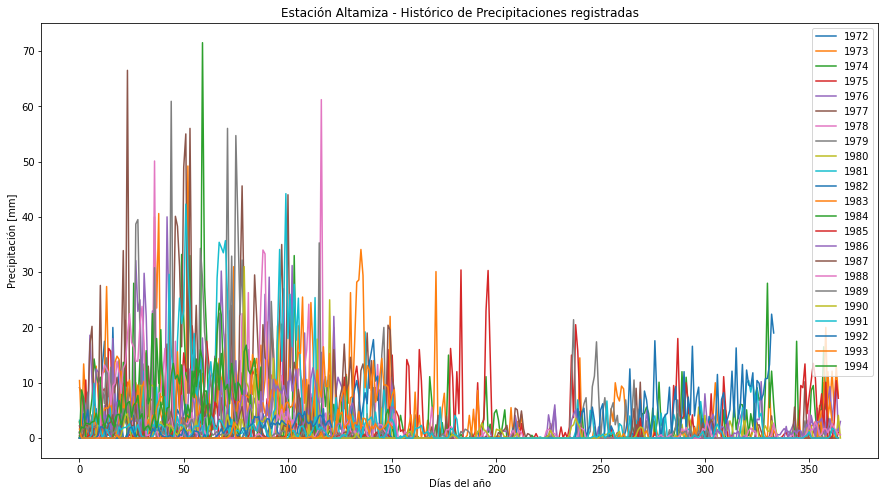

In [18]:
# DataFrame en blanco
grafica_ALTAMIZA = pd.DataFrame()

# Generar una lista de años para visualizar
years_list = [str(i) for i in range(1972, 1994+1)]  

# Select data for each year and concatenate with prices here 
for year in years_list:
    est_ALTAMIZA_meses = est_ALTAMIZA.loc[year, ['VALOR']].reset_index(drop=True)
    est_ALTAMIZA_meses.rename(columns={'VALOR': year}, inplace=True)
    grafica_ALTAMIZA = pd.concat([grafica_ALTAMIZA, est_ALTAMIZA_meses], axis=1)

# Plot prices
ax = grafica_ALTAMIZA.plot(figsize=(15,8))
ax.set(title='Estación Altamiza - Histórico de Precipitaciones registradas', 
       xlabel='Días del año', 
       ylabel='Precipitación [mm]');

Nótese cómo los datos nos indican el patrón que siguen las lluvias en dicho lugar. Por ahora 

Para mayor información sobre los argumentos disponibles en `pd.DataFrame.plot()`, revisar este [enlace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

----

### Conclusiones

1. Cuando se cambia el formato de fechas de tipo `object` (string) a uno de tipo fecha (date), se agiliza el proceso de visualización (y mejora su interpretación). **De no hacerlo, demorará completar el proceso de visualización con matplotlib y se verán indistinguibles las fechas en el eje X.**

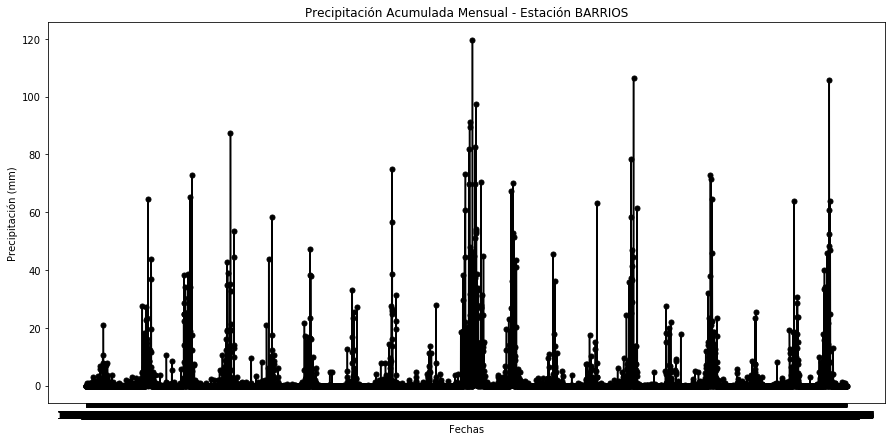

In [12]:
# 1. Importando archivo csv
import pandas as pd 
estac_2 = pd.read_csv('BARRIOS.csv')

# 2. Convertir a tipo fecha
estac_2.FECHA = pd.to_datetime(estac_2.FECHA) # devuelve a datetime64[ns] (tipo fecha)

# 3. Modificar el formato (convierte a string)
import datetime as dt
estac_2.FECHA = estac_2.FECHA.dt.strftime('%Y/%m/%d') # convierte a string según formato

# 4. Visualización (FECHA en tipo object `string`)
plt.figure(1,figsize=(15,7))

plt.plot(estac_2.FECHA, estac_2.VALOR, c='black', marker='o', ms=5)
plt.title('Precipitación Acumulada Mensual - Estación BARRIOS')
plt.xlabel('Fechas'), plt.ylabel('Precipitación (mm)'); 